# Notebook to test random Code chunks.
The ultimate Sandbox

In [5]:
import numpy as np
import os as os
import sys as sys
import multiprocessing as mp
import matplotlib.pyplot as plt
import pandas as pd
import socket

### Pick the right path (whether on cluster or at home)
socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
elif socket_name.startswith("Harald-Laptop-X1"):
    path = "/home/hringbauer/git/HAPSBURG/"
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)

#sys.path.append("./Python3/")  # Since now we are in the Root Directory
#from hmm_inference import HMM_Analyze   # Do not move. Should be after sys.path..
#sys.path.append("./Python3/create1000G_Mosaic/")  # Since now we are in the Root Directory
#from createMosaicsMulti import Mosaic_1000G_Multi  # Import the object that can create the Multiruns

print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

midway2-0401.rcc.local
Midway jnovmbre partition detected.
/project2/jnovembre/hringbauer/HAPSBURG
CPU Count: 28


## Test Own Example Package

# Test direct shell code on cluster

## Plot some Bessel Functinos

In [2]:
from scipy.special import kv

In [35]:
xlim =[0,20]
x = np.linspace(0.1,20, 10000)

y0 = kv(0, x)
y1 = x * kv(1, x)
y2 = x**2 * kv(2, x)
y3 = x**3 * kv(3, x)

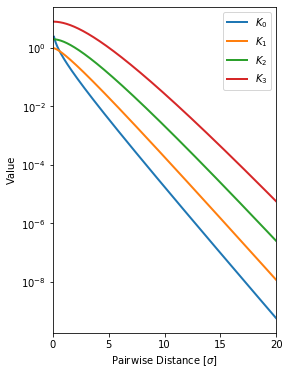

In [37]:
plt.figure(figsize=(4,6))
ax = plt.gca()
ax.plot(x, y0, label=f"$K_0$", lw=2)
ax.plot(x, y1, label=f"$K_1$", lw=2)
ax.plot(x, y2, label=f"$K_2$", lw=2)
ax.plot(x, y3, label=f"$K_3$", lw=2)
ax.legend()
ax.set_xlim(xlim)
ax.set_yscale("log")
ax.set_xlabel(f"Pairwise Distance [$\sigma$]")
ax.set_ylabel("Value")
plt.show()